<a href="https://colab.research.google.com/github/Yourownvibhore/Estimating-battery-RUL/blob/main/Batery_RUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


---



*   The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

*   The idea behind the project is to estimate RUL of battery measuring only voltage (V) and current (A).

Source datasets: The public datasets can be found here: https://www.batteryarchive.org/list.html 14 databases are selected from the HNEI source. The .csv files are the time series named 'HNEI_18650_NMC_LCO_25C_0-100_0.5/1.5C_'.

---



In [1]:
import pandas as pd
import numpy as np

In [2]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: Battery_RUL.csv         


In [3]:
df=pd.read_csv("/content/Battery_RUL.csv")

In [4]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.shape

(15064, 9)

In [7]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

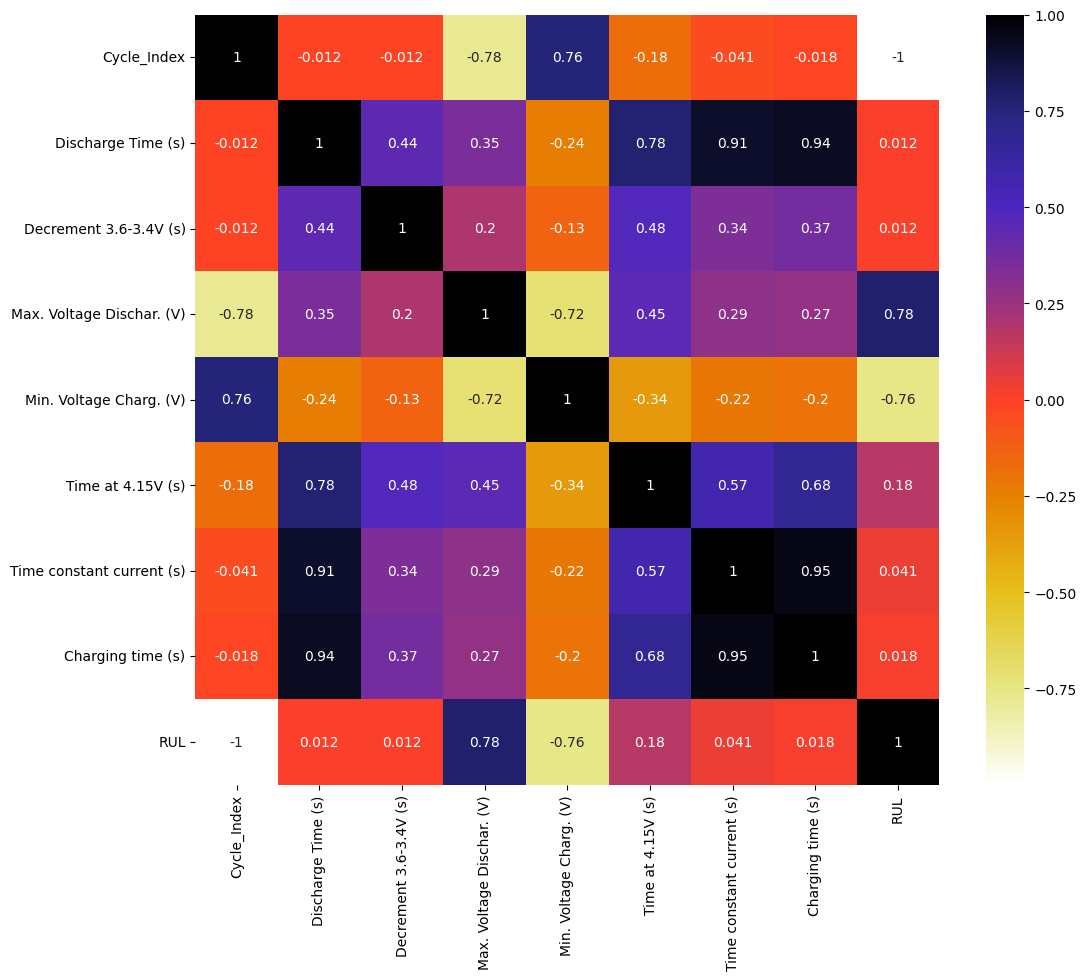

In [9]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

# Insights from the above heatmap

The heatmap shows the correlation between different features in the dataset. The darker the color, the stronger the correlation.

* Discharge Time and Charging time,Time Constant Current and Charging Time have high correlation.

* Cycle_index is highly negatively correlated to RUL



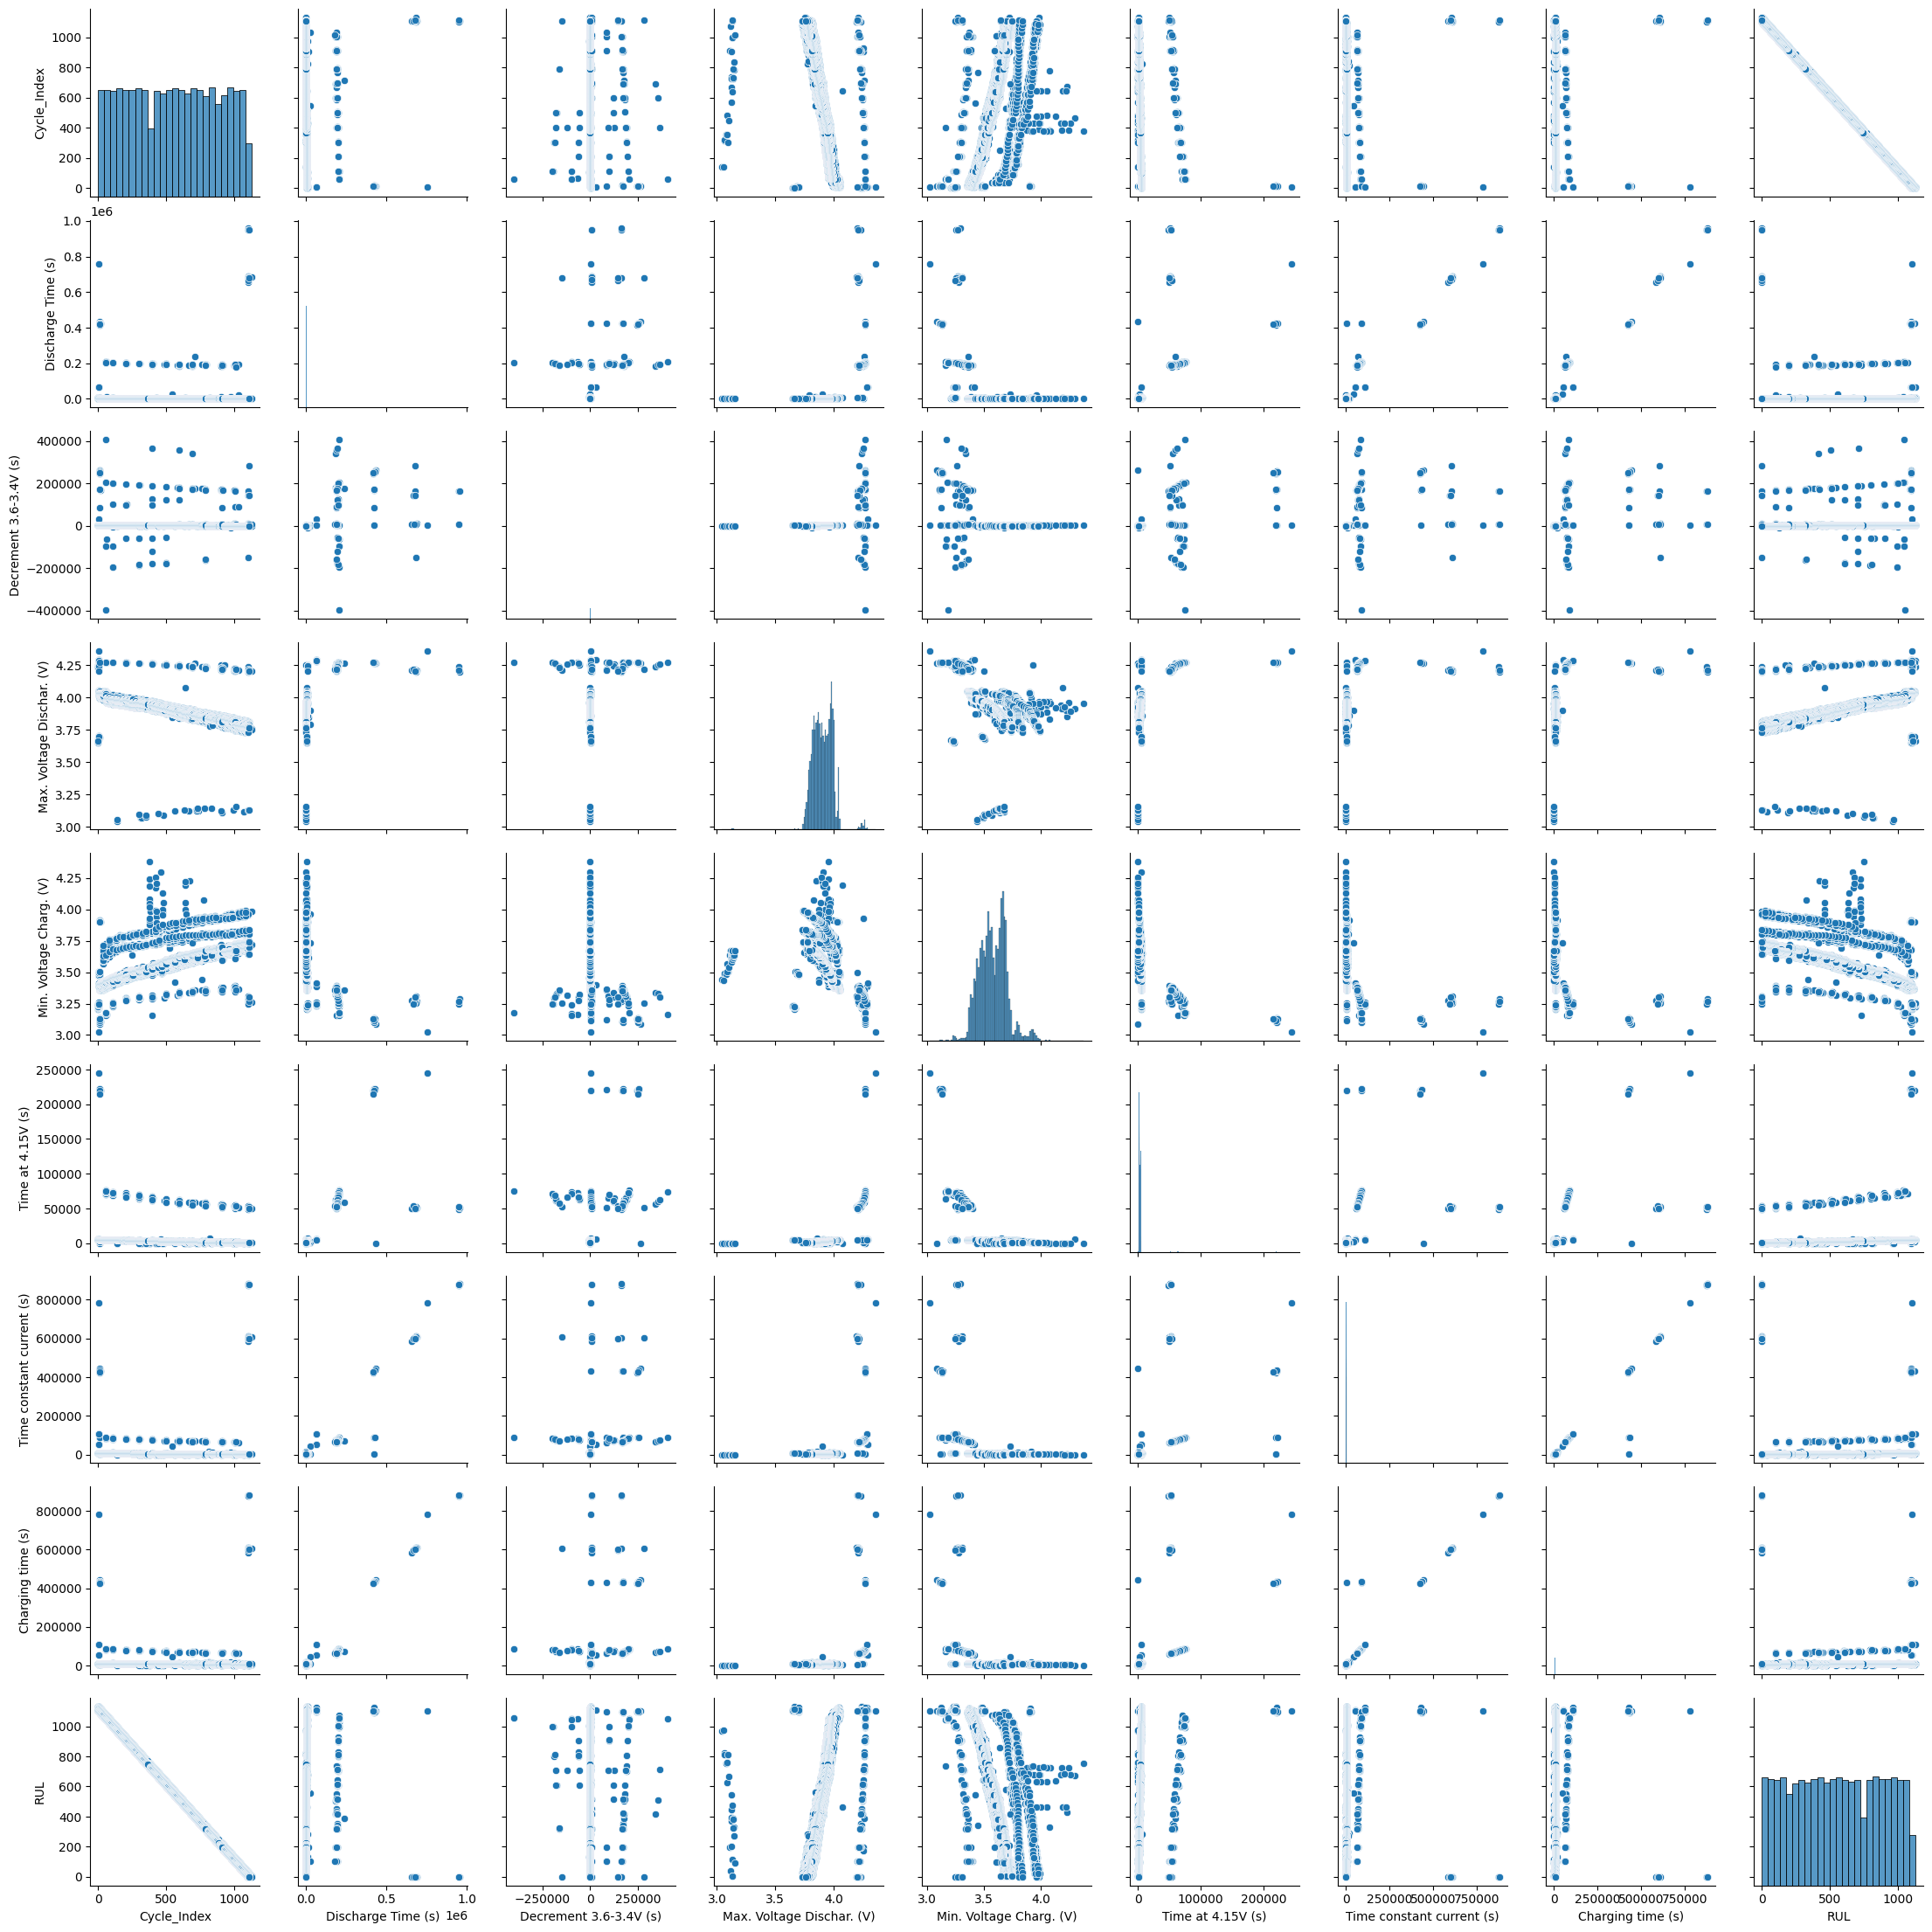

In [10]:
sns.pairplot(df)

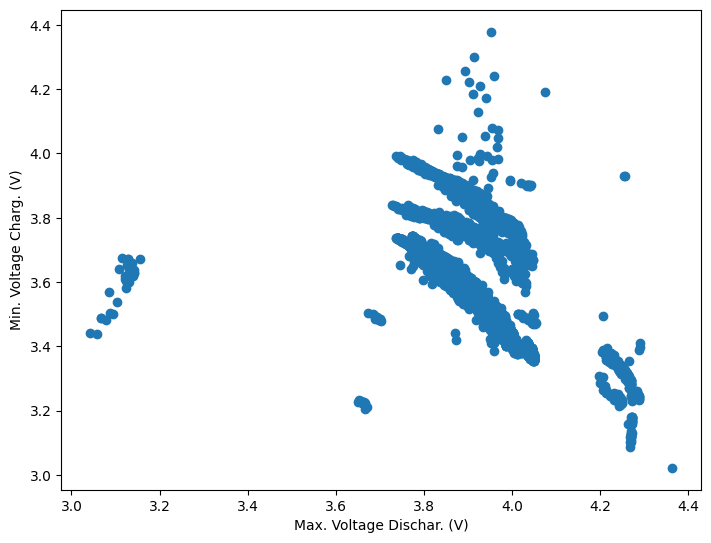

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(df['Max. Voltage Dischar. (V)'],df['Min. Voltage Charg. (V)'])
ax.set_xlabel('Max. Voltage Dischar. (V)')
ax.set_ylabel('Min. Voltage Charg. (V)')
plt.show()

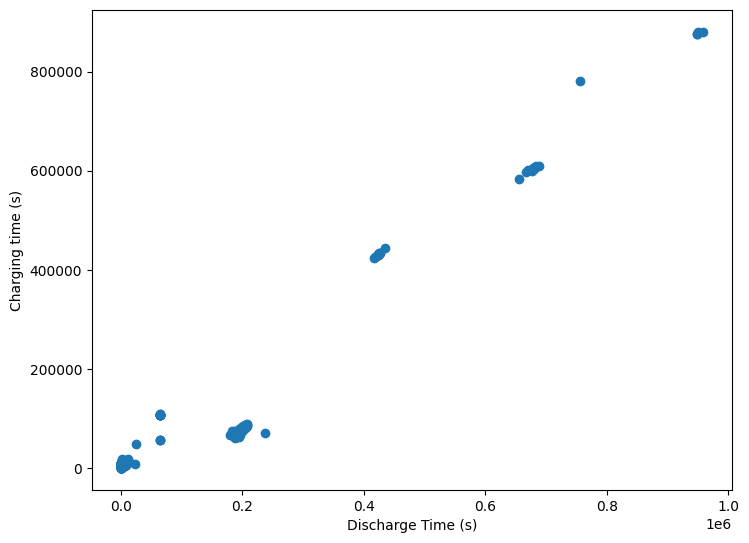

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(df['Discharge Time (s)'],df['Charging time (s)'])
ax.set_xlabel('Discharge Time (s)')
ax.set_ylabel('Charging time (s)')
plt.show()

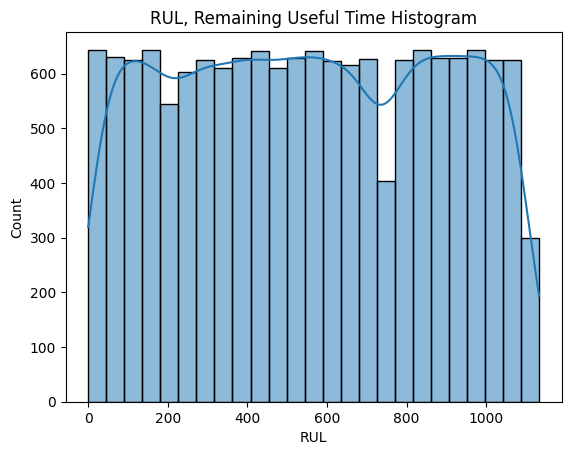

In [13]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df['RUL'], kde=True)
plt.show()

<ipython-input-14-24981d67c933>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RUL'])


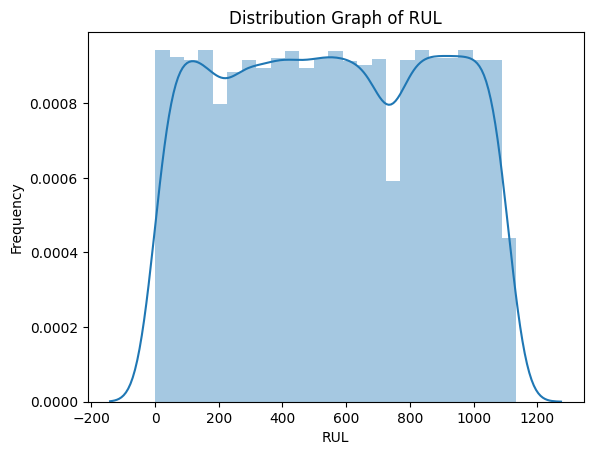

Skewness: 0.00619199024288733
Kurtosis: -1.208426132442976


In [14]:
sns.distplot(df['RUL'])
plt.title('Distribution Graph of RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()
print("Skewness:", df['RUL'].skew())
print("Kurtosis:", df['RUL'].kurtosis())

# Distribution



*   The above distribution graph shows the frequency of RUL values in the dataset. The x-axis of the graph represents the RUL values, and the y-axis represents the number of data points.

*   From the above graph and the values of kurtosis and skewness we can say the distribution graph of RUL is skewed to right, which means that there are more data points with lower RUL values than with higher RUL values. This suggests that the batteries in the dataset are more likely to fail sooner rather than later.

* As the data is not normally distributed, we will use the MinMaxScaler to scale the data.





In [15]:
X=df.drop(columns=['RUL'])
y=df['RUL']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [17]:
from sklearn.preprocessing import  MinMaxScaler
preprocessor = MinMaxScaler()

In [18]:
X_train=preprocessor.fit_transform(X_train)

In [19]:
X_test=preprocessor.transform(X_test)

In [20]:
#importing all the necessary libraries
!pip install catboost
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.8 MB/s eta 0:00:00


In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.1142
- Mean Absolute Error: 4.5104
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1317
- Mean Absolute Error: 4.5283
- R2 Score: 0.9995


Lasso
Model performance for Training set
- Root Mean Squared Error: 7.9354
- Mean Absolute Error: 5.3892
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.9801
- Mean Absolute Error: 5.4909
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.1532
- Mean Absolute Error: 4.5106
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1700
- Mean Absolute Error: 4.5299
- R2 Score: 0.9995


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.4918
- Mean Absolute Error: 2.2131
- R2 Score: 0.9997
-----------------------

# Conclusion

* XGBRegressor model performed best among the models we considered, with the highest R2 score and the lowest RMSE and MAE on both the training and test datasets.

* The Linear Regression, Lasso, and Ridge models also performed well, with R2 scores above 0.9 and RMSE and MAE values that were also relatively low.


The results suggests that XGBRegressor is the most suitable model for predicting the remaining useful life of batteries based on the features we have right now.